In [1]:
# import os
import matplotlib.pyplot as plt
import os
import pandas as pd
from amftrack.util.sys import get_analysis_folders,get_time_plate_info_from_analysis,get_time_hypha_info_from_analysis,get_global_hypha_info_from_analysis 
import numpy as np
import imageio
import os
import cv2
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from amftrack.pipeline.final_analysis.density_wave import get_wave_fit, S, dS, wave, dwave
import matplotlib.patches as mpatches
from random import choice
import matplotlib as mpl
from amftrack.pipeline.final_analysis.density_wave import plot_single_plate,plot_single_plate_biovolume
from amftrack.pipeline.final_analysis.hypha_speed_analysis import *
from amftrack.util.plot import gridplot, make_stat
from helper import *

%store -r path_figure
%matplotlib widget
%load_ext autoreload
%autoreload 2
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import scipy
import statsmodels.api as sm
import hashlib
from matplotlib.patches import Ellipse
import logging
plt.style.use('presentation.mplstyle')
logging.getLogger().setLevel(logging.WARNING)

all_analysis_folders = get_analysis_folders()

plate_select = [792,1014,1042,127,130,1023,1045,1053,1048,52,84,938,1076,94,152,102,76,3,12,16,480,91,799,800] #C2
plates = ['1014_20220525', '1023_20220502',
          # '102_20201226',
          '1042_20220523',
       '1045_20220504', '1048_20220506',
          # '1053_20220413',
          '1076_20220511',
       # '127_20220705',
          # '152_20201224',
          "3_20220426", "12_20220502","16_20220419","480_20221205", '52_20220707',
          # '76_20210108',
       # '792_20210915', '799_20211001', '800_20210928',
          '84_20220621', '91_20220708', '938_20220325',
          # '94_20201123'
         ]
plates += ["28_20230227",
"206_20230303",
"202_20230314",
"218_20230227",
"219_20230307",
"229_20230330",]
# plates += [
# "850_20230511",
# "840_20230404",
# "861_20230411"
# ]
plates += ["527_20230106","537_20230111"]
plates += ["462_20221013"]
plates += ["532_20220104"]
plates += [
"249_20230324",
"241_20230403",
"252_20230316",
"248_20230320",
]
plates += ['474_20230807']

plates += ['443_20230720','436_20230717']
plates += ["777_20230328", "772_20230317", "771_20230411"]
plates += [
    "896_20230424",
    "894_20230516",
    "891_20230519",
    "886_20230516",
    "870_20230427",
    "868_20230504",
    "796_20230419",
    "795_20230403",
    "764_20221219",
]
plates += ["510_20221201","521_20230104"]
plates += [
        # "559_20230109", 
          "558_20230109",
          "552_20230111",
          "551_20220102",
          # "545_20220115",
          # "544_20230109",
          "540_20221227",
          # "531_20221222",
]
plates += [
        "559_20230109", 

          # "545_20220115",
          "544_20230109",
          "531_20221222",
]
plates += [
    # "522_20230115",
         "514_20221206",
         "513_20221205",
         "506_20221124",
         # "503_20221124",
         "472_20221003"
          ]
plates += [
          "558_20230109",
          "552_20230111",
          "551_20220102",
          "540_20221227",
]
plates += [
    "931_20230620",
    "935_20230620",
    "930_20230626",
         ]
plates += ['478_20230814', '468_20230809', '447_20230821', '487_20230922',
       '492_20230901', '471_20230821', '486_20231009',
       '494_20230908',
          '482_20230908',
          # '495_20231013',
          # '463_20231013',
       # '491_20231013', 
          '481_20231005', '483_20231005', 
          '490_20231003',
       '485_20230929',
          "310_20230830"
         ]
analysis_folders = all_analysis_folders.loc[all_analysis_folders['unique_id'].isin(plates)]


c:\users\coren\documents\phd\code\amftrack\amftrack\util\dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
folders,time_plate_info = get_time_plate_info_from_analysis(analysis_folders,False)
# folders,global_hypha_info = get_global_hypha_info_from_analysis(analysis_folders,False)
# folders, time_hypha_info = get_time_hypha_info_from_analysis(analysis_folders,False)

In [3]:
timestep = {32:100,28:60,30:80,1014: 80, 1023:60, 1037:70, 1042:100,52 : 65,56:50,938:30,1076:60,84:80,89:80,91:70,127:60,129:50,94:150,152:35,792:60,1048:60,1045:50,941:50}
timestep2 = {102:25,83:70,76:20,81:70,32:100,28:60,30:80,1014: 80, 1023:60, 1037:70, 1042:100,52 : 75,56:50,938:30,1076:60,84:80,89:80,91:70,127:60,129:50,94:100,152:35,792:50,1048:60,1045:50}
timestep = {**timestep, **timestep2}
timestep2 = {1014 : 80,1024:25,1027:18,1028:60,1030 : 60,1032 : 50,1042 : 120,1048:70,127:120,129:60,130:50,991:40}
timestep = {**timestep, **timestep2}
timestep2 = {1023 : 60,1031:30,1035:30,1037 : 80,1039 : 90,1045:70,1047:50,1053:40}
timestep = {**timestep, **timestep2}    

timestep2 = {1071 : 25,1076:70,839:60,938 : 35}
timestep = {**timestep, **timestep2}
timestep2 = {30 : 62,32 : 160,33:80}
timestep = {**timestep, **timestep2}
timestep2 = {799 : 100,800 : 25,91:100,99:40}
timestep = {**timestep, **timestep2}
timestep2 = {3:144,16 : 39, 12:70,480:150,28 : 100}
timestep = {**timestep, **timestep2}
timestep2 = {3:144,16 : 39, 12:70,480:150,28 : 100,206 : 90,202 : 100,218 : 100,219 :100,229 :100}
timestep = {**timestep, **timestep2}
for j in range(0,len(plates)):
    plate_id=plates[j]
    plate  = int(plate_id.split('_')[0])
    if not plate in timestep.keys():
        timestep[plate] = 100

In [4]:
ncols = 3

time_plate_info = time_plate_info.replace(-1.0,np.nan)

# fig,axs = gridplot(len(plates)+1,ncols = ncols,subh = 3,subw = 3)
# ax_list = list(axs)
plate_speeds = {}
for j in range(0,len(plates)):
    plate_id=plates[j]
    plate  = int(plate_id.split('_')[0])
    # ax = ax_list[j]
    hull_speeds = []
    hull_time = []
    time_plate_info_plate = time_plate_info.loc[time_plate_info['unique_id']==int(plate_id)]
    time_plate_info_plate = time_plate_info_plate.loc[time_plate_info_plate['timestep']<timestep[plate]]
    # ax.plot(time_plate_info_plate['time_since_begin_h'],time_plate_info_plate['hull_speed'],
    #                 color="black")
    # ax.set_title(plate_id)
    plate_speeds[plate_id] = np.nanmedian(time_plate_info_plate['hull_speed'])

C:\Users\coren\anaconda3\envs\amftrack\lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


In [5]:
time_plate_info["density"] = time_plate_info["tot_length_study"]/time_plate_info["area_sep_comp"]
time_plate_info["density_biovolume"] = time_plate_info["tot_biovolume_study"]/time_plate_info["area_sep_comp"]
time_plate_info["density_SA"] = time_plate_info["tot_surface_area_study"]/time_plate_info["area_sep_comp"]



In [6]:
time_plate_info = time_plate_info.replace(-1.0,np.nan)

# fig,axs = gridplot(len(plates)+1,ncols = ncols,subh = 3,subw = 3)
# ax_list = list(axs)
plate_density = {}
plate_density_biov = {}
plate_radius = {}
plate_radius_SA = {}

plate_SA_density = {}

fungalC = {}

plate_strain = {}
plate_start = {}
root = {}
for j in range(0,len(plates)):
    plate_id=plates[j]
    plate  = int(plate_id.split('_')[0])
    # ax = ax_list[j]
    hull_speeds = []
    hull_time = []
    time_plate_info_plate = time_plate_info.loc[time_plate_info['unique_id']==int(plate_id)]
    folders_plate = folders.loc[folders['unique_id']==int(plate_id)]
    time_plate_info_plate = time_plate_info_plate.loc[time_plate_info_plate['timestep']<timestep[plate]]
    # ax.plot(time_plate_info_plate['time_since_begin_h'],np.sqrt(time_plate_info_plate['density']),
    #                 color="black")
    # ax2 = ax.twinx()
    # ax2.plot(time_plate_info_plate['time_since_begin_h'],time_plate_info_plate['density']/time_plate_info_plate['density_biovolume'],
    #                 color="red")
    time_plate_info_plate_median = time_plate_info_plate.loc[time_plate_info_plate['timestep']>=min(max(time_plate_info_plate['timestep']),timestep[plate]-10)]

    plate_density[plate_id] = np.nanmedian(time_plate_info_plate_median['density'])
    plate_density_biov[plate_id] = np.nanmedian(time_plate_info_plate_median['density_biovolume']) 
    plate_radius[plate_id] = np.nanmedian(np.sqrt(time_plate_info_plate_median['density_biovolume']/time_plate_info_plate_median['density']/np.pi)) 
    plate_radius_SA[plate_id] = np.nanmedian(time_plate_info_plate_median['density_SA']/time_plate_info_plate_median['density']/(2*np.pi)) 
    
    plate_strain[plate_id] = folders_plate['strain'].iloc[0]
    plate_start[plate_id] = folders_plate['CrossDate'].iloc[0]
    fungalC[plate_id] = folders_plate['fungalC'].iloc[-1]
    root[plate_id] = folders_plate['root'].iloc[-1]
    
    plate_SA_density[plate_id] = np.nanmedian(time_plate_info_plate_median['density_SA'])
    # ax.set_title(plate_id)
    # break

C:\Users\coren\anaconda3\envs\amftrack\lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


In [7]:
df = pd.DataFrame({
    'plate_id': list(plates),
    'start': [plate_start[x] for x in plates],
    'speed': [plate_speeds[x] for x in plates],
    'density_SA': [plate_SA_density[x] for x in plates],
    'density_BV': [plate_density_biov[x] for x in plates],
    'density_L': [plate_density[x] for x in plates],
    
    'radius': [plate_radius[x] for x in plates],
    'radius_SA': [plate_radius_SA[x] for x in plates],
    
    'strain': [plate_strain[x] for x in plates],
    'fungalC': [fungalC[x] for x in plates],
    'root': [root[x] for x in plates],
    
    
})
df['strain'] = df['strain'].replace("'A5sp3'","'A5'")
df['fungalC'] = df['fungalC'].replace(np.nan,"100P100N")

df['BV_growth_coeff'] = df['speed']**2*df['density_BV']
df['SA_growth_coeff'] = df['speed']**2*df['density_SA']*np.pi
df['L_growth_coeff'] = df['speed']**2*df['density_L']
df['SA_growth_coeff2'] = df['L_growth_coeff'] * df['radius_SA']*2*np.pi
df['density_SA'] = df['density_SA']/1e6
df['density_BV'] = df['density_BV']/1e9
df['density_L'] = df['density_L']/1e3


In [8]:
df = df[df['strain']=="'C2'"]
df.loc[df['plate_id'] == '470_20230709', 'fungalC'] = "'000P100N'"
df.loc[df['fungalC'] == "'000P100N'", 'strain'] = "'C2_0P'"
df.loc[df['root'] == "'CarrotEN'", 'root'] = "Carrot_Vasilis"
df.loc[df['root'] == "'Carrot'", 'root'] = "Carrot"
# df.loc[(df['start'] >= 20230201)&(df['root'] != "'Chicory'"), 'root'] = "Carrot_Vasilis"
# df = df[df['strain']=="'C2'"]
root_dir = r"C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA"
analysis_dir = "PRINCE_ANALYSIS"
df_sum = pd.read_excel(os.path.join(root_dir, analysis_dir, "plate_summary2.xlsx"))
df_sum['real_root'] = df_sum['root']
df_sum.loc[df_sum['real_root'] == "EN daurus carota", 'real_root'] = "Carrot Vasilis"
df_sum.loc[df_sum['real_root'] == "carrotV", 'real_root'] = "Carrot Vasilis"
df_sum.loc[df_sum['real_root'] == "CarrotEN", 'real_root'] = "Carrot Vasilis"

df_sum.loc[df_sum['real_root'] == "Carrot", 'real_root'] = "Carrot Toby"

df_sum.loc[df_sum['real_root'] == "carrot", 'real_root'] = "Carrot Toby"
df_sum.loc[df_sum['real_root'] == "CH cichorium intybus", 'real_root'] = "Chichorium"
df_sum.loc[df_sum['real_root'] == "BE nicotiana benthamiana", 'real_root'] = "Nicotiana"
df_sum.loc[df_sum['FungalSide'] == '100P100N100C', 'FungalSide'] = '100P/100N/100C'
df_sum['FungalSide'] = df_sum['FungalSide'].fillna('100P/100N/100C')


merged_df = df.merge(df_sum, left_on='plate_id', right_on='unique_id', how='inner')

In [9]:
time_plate_info['radius'] = np.sqrt(time_plate_info['tot_biovolume_study']/time_plate_info['tot_length_study']/2/np.pi)
# Initialize an empty DataFrame to hold the concatenated data
concatenated_data = []
tmax = 150
thresh_area = 400
for j in range(0, len(plates)):
    
    plate_id = plates[j]
    if plate_start[plate_id] >= 20220101:
        
        plate = int(plate_id.split('_')[0])
        
        time_plate_info_plate = time_plate_info.loc[time_plate_info['unique_id'] == int(plate_id)]
        time_plate_info_plate = time_plate_info_plate.sort_values(by='time_since_begin_h')
        folders_plate = folders.loc[folders['unique_id'] == int(plate_id)]
        # time_plate_info_plate = time_plate_info_plate.loc[time_plate_info_plate['timestep'] < timestep[plate]]
        
        late_start = len(time_plate_info_plate[time_plate_info_plate['area_sep_comp'] >= thresh_area]['time_since_begin_h'])==len(time_plate_info_plate)
        early_stop = len(time_plate_info_plate[time_plate_info_plate['area_sep_comp'] >= thresh_area])==0
        time_plate_info_plate['late_start']=late_start
        time_plate_info_plate['early_stop']=early_stop
        if not early_stop:
            t_shift = time_plate_info_plate[time_plate_info_plate['area_sep_comp'] >= thresh_area]['time_since_begin_h'].iloc[0]
       
        else:
            t_shift = 0

        time_plate_info_plate['time_since_begin_h_shifted'] = time_plate_info_plate['time_since_begin_h'] - t_shift
        # if plate_id == "84_20220621":
        #     print(time_plate_info_plate[time_plate_info_plate['time_since_begin_h_shifted'].isna()]['time_since_begin_h_shifted']) 
        #     break
        # t_shift = time_plate_info_plate[time_plate_info_plate['area_sep_comp'] >= 1000]['time_since_begin_h'].iloc[0]
        # time_plate_info_plate['time_since_begin_h_shifted_1000'] = time_plate_info_plate['time_since_begin_h'] - t_shift
        # Add the strain information to the DataFrame
        time_plate_info_plate['strain'] = plate_strain[plate_id]
        # time_plate_info_plate['is_in'] = time_plate_info_plate['timestep']<timestep[plate]
        time_plate_info_plate['ZMUV_radius'] = (time_plate_info_plate['radius']-np.mean(time_plate_info_plate['radius']))
        time_plate_info_plate['ZMUV_SA'] = (time_plate_info_plate['radius']**2-np.mean(time_plate_info_plate['radius']**2))
        time_plate_info_plate['real_root'] = df_sum[df_sum['unique_id']==plate_id]['real_root'].iloc[0]
        time_plate_info_plate['fungalC'] = df_sum[df_sum['unique_id']==plate_id]['FungalSide'].iloc[0]
        
        time_plate_info_plate['strain_unique_id'] = time_plate_info_plate['strain'].astype(str) + '_' + time_plate_info_plate['unique_id'].astype(str)
        # Append this modified DataFrame to a list
        concatenated_data.append(time_plate_info_plate)

# Concatenate all the DataFrames in the list into a single DataFrame
final_data = pd.concat(concatenated_data)

# Replace -1.0 with NaN
# final_data = final_data.replace(-1.0, np.nan)
bin_size = 10

final_data['time_hour_binned'] = final_data['time_since_begin_h_shifted'].astype(int)//bin_size*bin_size
final_data['strain'] = final_data['strain'].replace("'A5sp3'","'A5'")
final_data['tot_volume'] = final_data['spore_volume']+final_data['tot_biovolume_study']
final_data['time_hour_binned'] = final_data['time_since_begin_h_shifted'].astype(int)//bin_size*bin_size

select = final_data[final_data['time_since_begin_h_shifted']<=tmax]
print(len(select['unique_id'].unique()))
select = select[select['late_start']==False]
print(len(select['unique_id'].unique()))
select = select[select['early_stop']==False]
print(len(select['unique_id'].unique()))
n_colors = len(final_data['strain'].unique())


73
65
64


In [10]:
select[select['fungalC']=='0P/100N/100C']['unique_id'].unique()

array([4.74202308e+10, 4.68202308e+10, 4.71202308e+10])

In [11]:
def calculate_derivative(df, column, new_column, window=1):
    # Ensure the DataFrame is sorted by 'unique_id' and 'time_since_begin_h'
    df.sort_values(by=['unique_id', 'time_since_begin_h'], inplace=True)
    
    # Calculate the time difference and value difference over the desired window
    df['time_diff'] = df.groupby('unique_id')['time_since_begin_h'].transform(lambda x: x.diff(window)).fillna(0)
    df['value_diff'] = df.groupby('unique_id')[column].transform(lambda x: x.diff(window)).fillna(0)

    # Calculate the derivative (value difference divided by time difference)
    # Be cautious about dividing by zero. If 'time_diff' is 0, set derivative to NaN or handle accordingly.
    df[new_column] = df.apply(lambda x: x['value_diff'] / x['time_diff'] if x['time_diff'] != 0 else None, axis=1)

    # Drop the helper columns
    df.drop(['time_diff', 'value_diff'], axis=1, inplace=True)
def calculate_integral(df, column, new_column):
    # Calculate the time difference within each group
    df.sort_values(by=['unique_id', 'time_since_begin_h'], inplace=True)
    df['time_since_begin_hour'] = df['time_since_begin_h']
    df['time_diff'] = df.groupby('unique_id')['time_since_begin_hour'].transform(lambda x: x.diff())

    # Calculate the average length density within each group
    df['avg_length_density'] = df.groupby('unique_id')[column].transform(lambda x: x.rolling(window=2).mean())

    # Calculate the "area" (using Trapezoidal rule) for each pair of rows within each group
    df['area'] = df['time_diff'] * df['avg_length_density']

    # Perform the integration (cumulative sum of "area") within each group
    df[new_column] = df.groupby('unique_id')['area'].transform(lambda x: x.cumsum())

    # Drop the helper columns if needed
    df.drop(['time_diff', 'avg_length_density', 'area'], axis=1, inplace=True)
calculate_integral(final_data,f'tot_surface_area_study',f'integrated_SA')
calculate_derivative(final_data,f'tot_biovolume_study',f'derivative_biovolume', window=5)
calculate_derivative(final_data,f'tot_volume',f'derivative_tot_biovolume', window=5)

Vmax = 3e-9*25 #ugP/um2/hour
density = 1e-6 #ug/um3
dry_wet_ratio = 0.3
carbon_ratio = 0.5
respiration_ratio = 0.5
final_data['P_rate'] =final_data['tot_surface_area_study']*Vmax
final_data['C_rate'] = final_data['derivative_biovolume']*density*dry_wet_ratio*carbon_ratio/respiration_ratio
final_data['totC'] = final_data['tot_biovolume_study']*density*dry_wet_ratio*carbon_ratio
final_data = final_data.reset_index(drop=True)
final_data['P_rate_bin'] = pd.cut(final_data['P_rate'], 10).apply(lambda x: (x.left + x.right) / 2)

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
n_colors = len(final_data['strain'].unique())

strain_to_color={"'C2'": (0.17058823529411765, 0.4946558433997788, 0.9667184042691874),
 "'A5'": (0.16666666666666663, 0.8660254037844386, 0.8660254037844387),
 "'Agg'": (0.503921568627451, 0.9999810273487268, 0.7049255469061472),
 "'Clarum'": (0.8333333333333333, 0.8660254037844387, 0.5000000000000001),
 "'C3'": (1.0, 0.4946558433997788, 0.2558427775944356)}

<AxesSubplot: xlabel='time_since_begin_h_shifted', ylabel='area_sep_comp'>

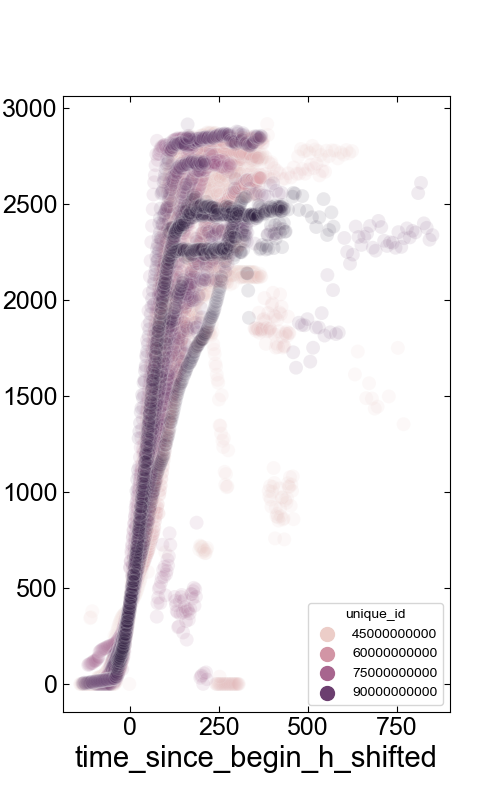

In [13]:
fig, ax = plt.subplots(figsize=(5,8))
select = final_data[final_data['strain']=="'C2'"]
select = select[select['late_start']==False]
select = select[select['early_stop']==False]


sns.scatterplot(data=select, x='time_since_begin_h_shifted', y='area_sep_comp', hue='unique_id', ax=ax, alpha=0.1)

(-100.0, 100.0)

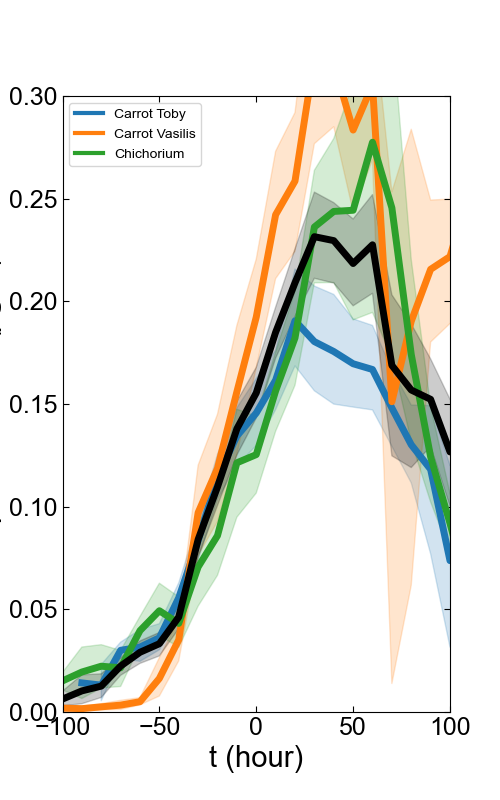

In [14]:
fig,ax = plt.subplots(figsize = (5,8))
n_colors = len(final_data['strain'].unique())

tmax = 150
# select = final_data[final_data['time_since_begin_h_shifted']<=tmax]
select = final_data[final_data['strain']=="'C2'"]
select = select[select['late_start']==False]
select = select[select['early_stop']==False]
select = select[select['fungalC']=='100P/100N/100C']

select = select.sort_values(by=['real_root', 'time_since_begin_h_shifted'])


# sns.lineplot(data=select, x='time_since_begin_h_shifted', y=select['tot_biovolume_study'], hue='strain', style='strain_unique_id',ax=ax, palette=strain_to_color,lw = 1)
sns.lineplot(data=select, x='time_hour_binned', y=select['C_rate'], hue='real_root', ax=ax, estimator='mean', lw=5, ls="-")
sns.lineplot(data=select, x='time_hour_binned', y=select['C_rate'], ax=ax, color = 'black', estimator='mean', lw=5, ls="-")

# ax.legend().remove()
ax.set_xlabel('t (hour)')
ax.set_ylabel('BV ($\mu m^3$)')
ax.set_ylim(0,0.3)
ax.set_ylabel('C provision rate ($\mu g/h$)')
ax.set_xlabel('t (hour)')
ax.set_xlim(-100,100)

# plt.savefig(os.path.join('figures', 'time_biovolume.pdf'), transparent=True, bbox_inches='tight')


(-70.0, 100.0)

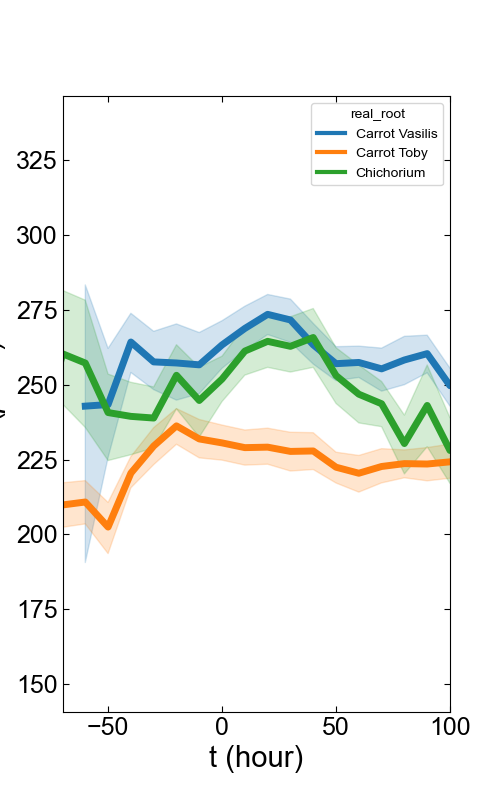

In [15]:
fig,ax = plt.subplots(figsize = (5,8))
n_colors = len(final_data['strain'].unique())

tmax = 150
select = final_data[final_data['strain']=="'C2'"]
select = select[select['late_start']==False]
select = select[select['early_stop']==False]
select = select[select['fungalC']=='100P/100N/100C']

# sns.lineplot(data=select, x='time_since_begin_h_shifted', y=select['tot_biovolume_study'], hue='strain', style='strain_unique_id',ax=ax, palette=strain_to_color,lw = 1)
sns.lineplot(data=select, x='time_hour_binned', y=select['hull_speed'], hue='real_root', ax=ax, estimator='mean', lw=5, ls="-")
# ax.legend().remove()
ax.set_xlabel('t (hour)')
ax.set_ylabel('BV ($\mu m^3$)')
# ax.set_ylim(0,1e8)
ax.set_xlim(-70,100)

# plt.savefig(os.path.join('figures', 'time_biovolume.pdf'), transparent=True, bbox_inches='tight')


(-70.0, 100.0)

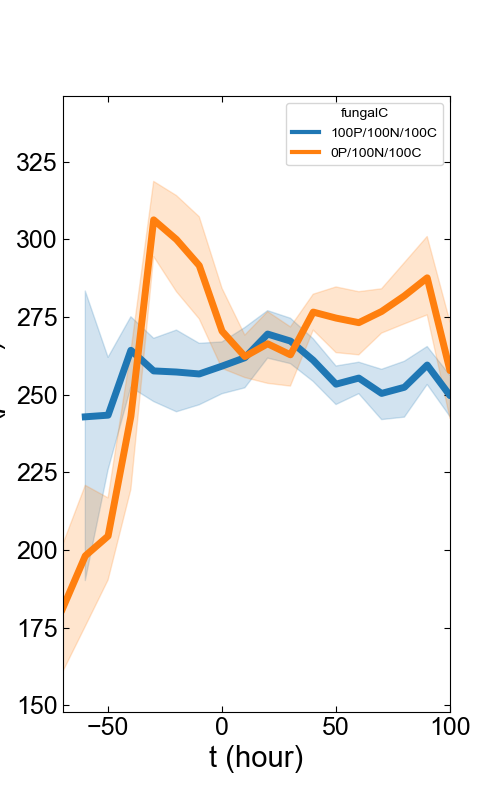

In [16]:
fig,ax = plt.subplots(figsize = (5,8))
n_colors = len(final_data['strain'].unique())

tmax = 150
select = final_data[final_data['real_root']=="Carrot Vasilis"]
select = select[select['late_start']==False]
select = select[select['early_stop']==False]

# sns.lineplot(data=select, x='time_since_begin_h_shifted', y=select['tot_biovolume_study'], hue='strain', style='strain_unique_id',ax=ax, palette=strain_to_color,lw = 1)
sns.lineplot(data=select, x='time_hour_binned', y=select['hull_speed'], hue='fungalC', ax=ax, estimator='mean', lw=5, ls="-")
# ax.legend().remove()
ax.set_xlabel('t (hour)')
ax.set_ylabel('BV ($\mu m^3$)')
# ax.set_ylim(0,1e8)
ax.set_xlim(-70,100)

# plt.savefig(os.path.join('figures', 'time_biovolume.pdf'), transparent=True, bbox_inches='tight')


(-70.0, 100.0)

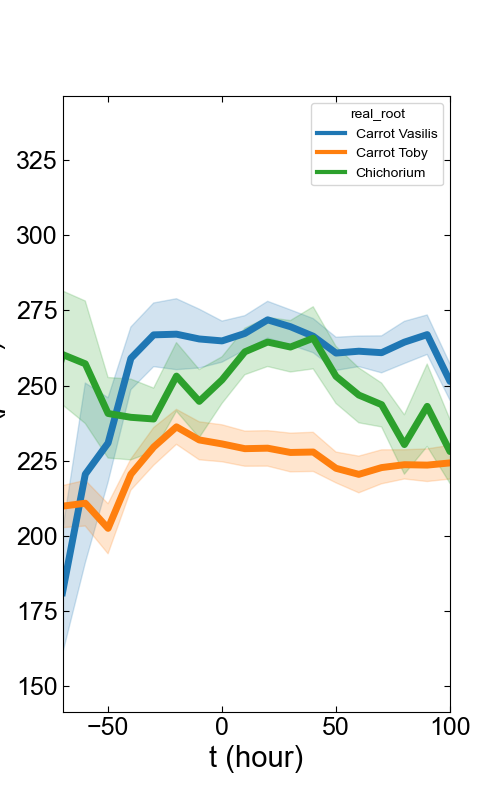

In [17]:
fig,ax = plt.subplots(figsize = (5,8))
n_colors = len(final_data['strain'].unique())

tmax = 150
select = final_data[final_data['strain']=="'C2'"]
select = select[select['late_start']==False]
select = select[select['early_stop']==False]

# sns.lineplot(data=select, x='time_since_begin_h_shifted', y=select['tot_biovolume_study'], hue='strain', style='strain_unique_id',ax=ax, palette=strain_to_color,lw = 1)
sns.lineplot(data=select, x='time_hour_binned', y=select['hull_speed'], hue='real_root', ax=ax, estimator='mean', lw=5, ls="-")
# ax.legend().remove()
ax.set_xlabel('t (hour)')
ax.set_ylabel('BV ($\mu m^3$)')
# ax.set_ylim(0,1e8)
ax.set_xlim(-70,100)

# plt.savefig(os.path.join('figures', 'time_biovolume.pdf'), transparent=True, bbox_inches='tight')


Text(0.5, 0, 't (hour)')

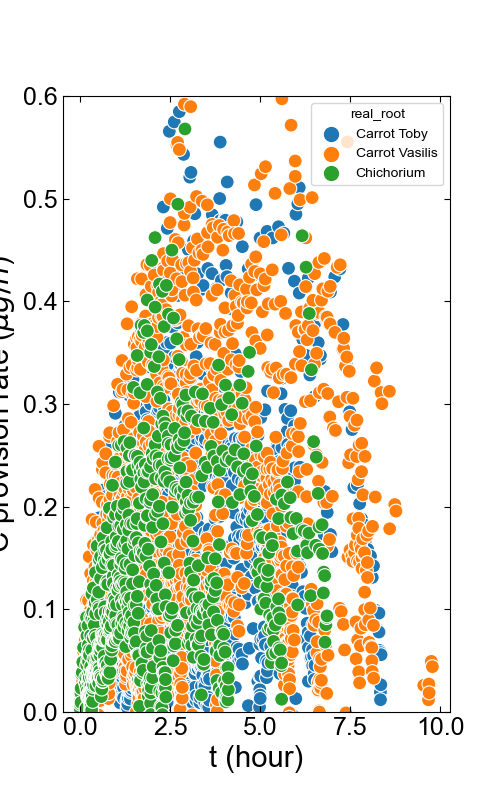

In [18]:
fig,ax = plt.subplots(figsize = (5,8))
n_colors = len(final_data['strain'].unique())

tmax = 150
select = final_data[final_data['time_since_begin_h_shifted']<=tmax]
select = select[select['strain']=="'C2'"]

# select = final_data[final_data['strain']=="'C2'"]
select = select.sort_values(by=['real_root', 'P_rate'])


# sns.lineplot(data=select, x='time_since_begin_h_shifted', y=select['tot_biovolume_study'], hue='strain', style='strain_unique_id',ax=ax, palette=strain_to_color,lw = 1)
sns.scatterplot(data=select, x='P_rate', y=select['C_rate'], hue='real_root', ax=ax, lw=5, ls="-")
# sns.lineplot(data=select, x='P_rate_binned', y=select['C_rate'], ax=ax, color = 'black', estimator='mean', lw=5, ls="-")

# ax.legend().remove()
ax.set_xlabel('t (hour)')
ax.set_ylabel('BV ($\mu m^3$)')
ax.set_ylim(0,0.6)
ax.set_ylabel('C provision rate ($\mu g/h$)')
ax.set_xlabel('t (hour)')
# ax.set_xlim(-40,100)

# plt.savefig(os.path.join('figures', 'time_biovolume.pdf'), transparent=True, bbox_inches='tight')


In [19]:

def plot_scatter_with_mean_and_ci(df, x_col, y_col, ax, label=None):
    n_colors = len(df['real_root'].unique())
    palette = sns.color_palette("rainbow", n_colors)
    strain_to_color = dict(zip(df['real_root'].unique(), palette))
    sns.scatterplot(data=df, x=x_col, y=y_col, hue='real_root', palette=strain_to_color, ax=ax)
    sns.regplot(data=df, x=x_col, y=y_col, scatter=False, color="black", ax=ax)

    for strain, color in strain_to_color.items():
        sub_df = df[df['real_root'] == strain]
        x_mean = sub_df[x_col].mean()
        y_mean = sub_df[y_col].mean()
        x_ci = 2 * sub_df[x_col].std()
        y_ci = 2 * sub_df[y_col].std()
        ax.errorbar(x=x_mean, y=y_mean, xerr=x_ci, yerr=y_ci, color=color, fmt='o')

    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    if label:
        ax.text(0.05, 0.95, label, transform=ax.transAxes, fontsize=16, fontweight='bold', va='top')
    


C:\Users\coren\anaconda3\envs\amftrack\lib\site-packages\matplotlib\axes\_axes.py:1174: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
C:\Users\coren\anaconda3\envs\amftrack\lib\site-packages\matplotlib\axes\_axes.py:1175: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


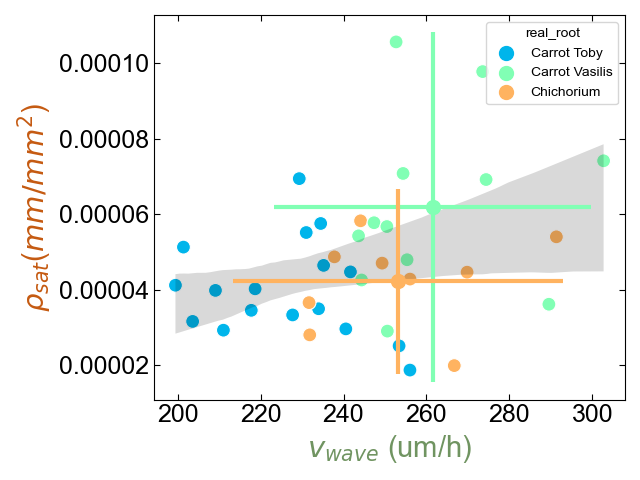

In [20]:
fig,ax = plt.subplots()
(x_col, y_col, label,xlabel,ylabel) =('speed', 'density_BV', '', '$v_{wave}$ (um/h)', r'$\rho_{sat}$($mm/mm^2$)')
select = final_data[final_data['strain']=="'C2'"]
select = select[select['late_start']==False]
select = select[select['early_stop']==False]
select = select[select['fungalC']=='100P/100N/100C']
select_df = merged_df[merged_df['unique_id'].astype(np.int64).isin(select['unique_id'].unique())]
select_df = select_df[select_df[x_col]>0]
select_df = select_df[select_df[y_col]>0]

plot_scatter_with_mean_and_ci(select_df, x_col, y_col, ax=ax, label=label)
ax.set_xlabel(xlabel,color = "#709461")
ax.set_ylabel(ylabel,color = "#C55A11")
plt.tight_layout()

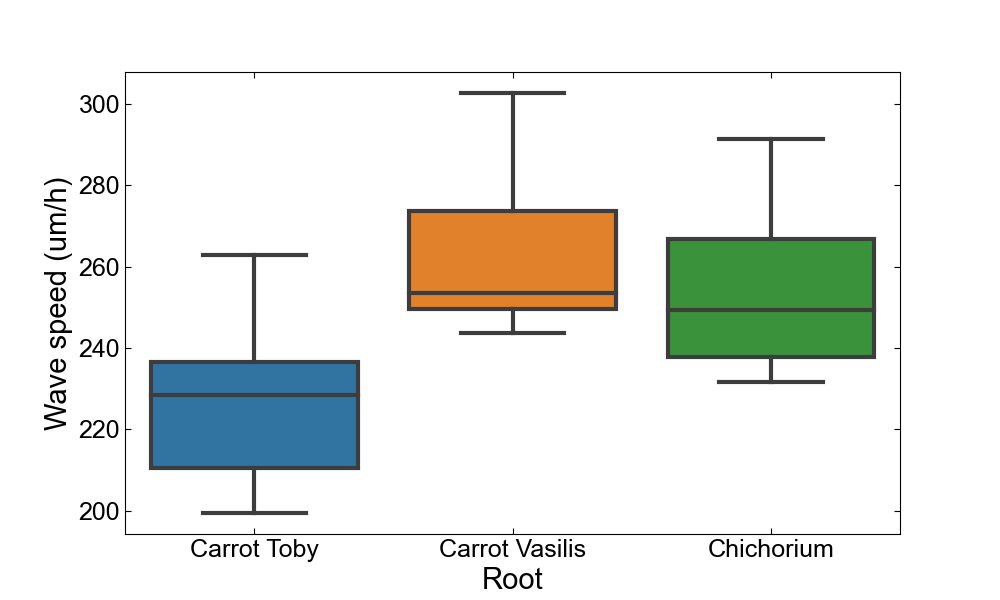

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with columns 'speed' and 'root'

# Create a boxplot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.boxplot(x='real_root', y='speed', data=select_df)

# Optional: You can add labels and a title to the plot
plt.xlabel('Root')
plt.ylabel('Wave speed (um/h)')
# plt.title('Boxplot of Speed by Root Category')

# Show the plot
plt.show()


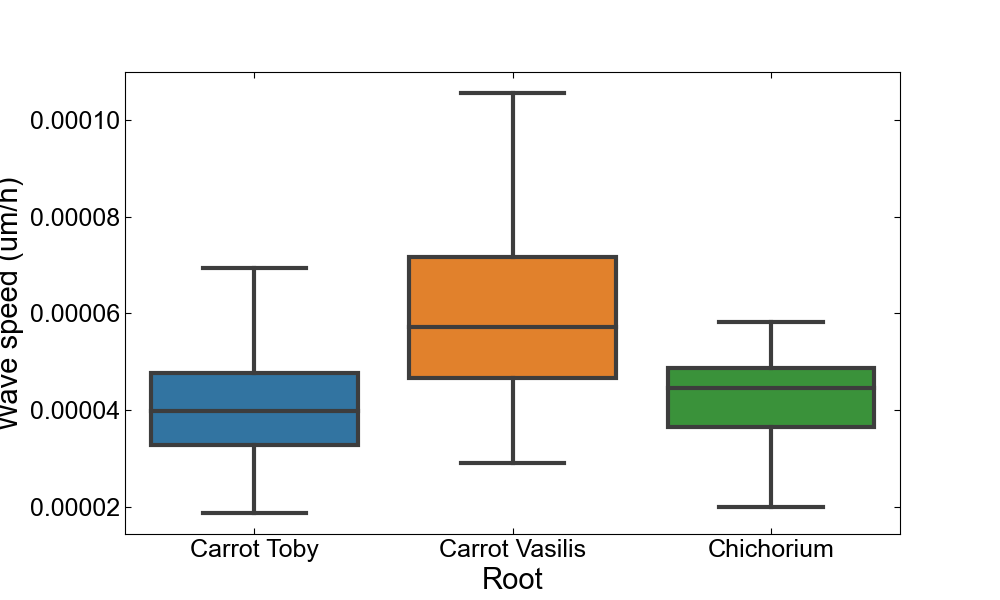

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with columns 'speed' and 'root'

# Create a boxplot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.boxplot(x='real_root', y='density_BV', data=select_df)

# Optional: You can add labels and a title to the plot
plt.xlabel('Root')
plt.ylabel('Wave speed (um/h)')
# plt.title('Boxplot of Speed by Root Category')

# Show the plot
plt.show()


In [29]:
(x_col, y_col, label,xlabel,ylabel) =('speed', 'density_BV', '', '$v_{wave}$ (um/h)', r'$\rho_{sat}$($mm/mm^2$)')
select = final_data[final_data['strain']=="'C2'"]
# select = select[select['late_start']==False]
# select = select[select['early_stop']==False]
select = select[select['real_root']=="Carrot Vasilis"]
select_df = merged_df[merged_df['unique_id'].astype(np.int64).isin(select['unique_id'].unique())]
select_df = select_df[select_df[x_col]>0]
select_df = select_df[select_df[y_col]>0]

In [24]:
final_data['real_root'].unique()

array(['Carrot Toby', 'Carrot Vasilis', 'Chichorium'], dtype=object)

In [30]:
select_df[select_df['FungalSide']=='0P/100N/100C']

,plate_id,start_x,speed,density_SA,density_BV,density_L,radius,radius_SA,strain,fungalC,...,unique_id,Analyzed,Suitable for coarse grain,Suitable for tracking,Suitable for width,Comments analysis,Analysis priority,Running,Suitable for spores,real_root
9,474_20230807,20230807,289.062711,0.017941,0.000025,1.275592,2.497190,2.238527,'C2_0P','000P100N',...,474_20230807,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,Carrot Vasilis
44,478_20230814,20230814,265.746324,0.016956,0.000026,1.000574,2.879789,2.692739,'C2_0P','000P100N',...,478_20230814,stitched,yes,NaN,yes,okay (UC and not so happy),NaN,NaN,NaN,Carrot Vasilis
45,468_20230809,20230809,272.219856,0.015247,0.000023,0.904210,2.810745,2.673421,'C2','100P100N',...,468_20230809,stitched,yes,yes,ys,okay (UC and not so happy),NaN,NaN,NaN,Carrot Vasilis
49,471_20230821,20230821,260.815565,0.020759,0.000033,1.135885,3.050669,2.906247,'C2_0P','000P100N',...,471_20230821,stitched,yes,yes,yes,okay (UC and not so happy),NaN,NaN,NaN,Carrot Vasilis


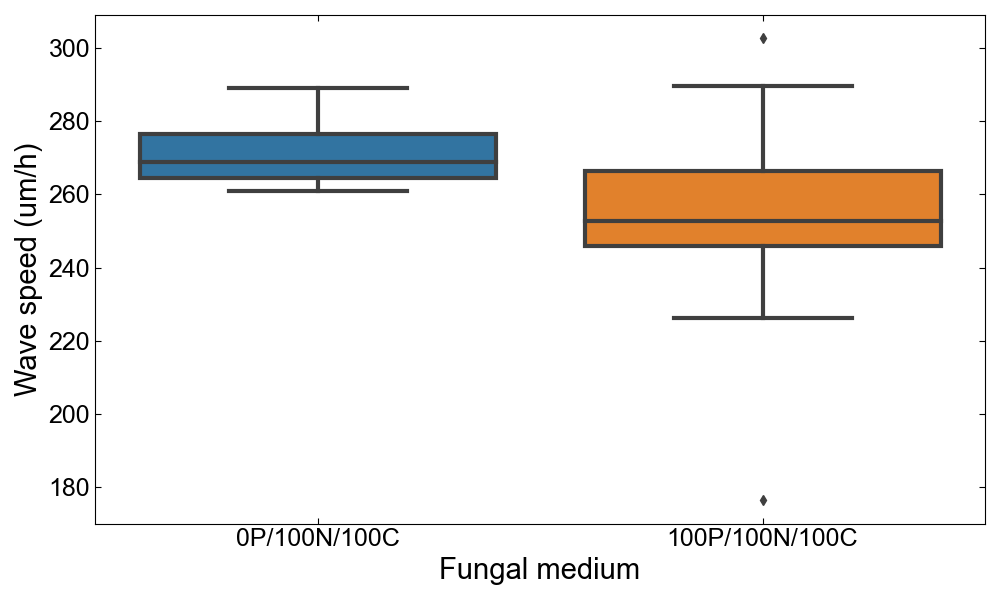

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with columns 'speed' and 'root'

# Create a boxplot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.boxplot(x='FungalSide', y='speed', data=select_df)

# Optional: You can add labels and a title to the plot
plt.xlabel('Fungal medium')
plt.ylabel('Wave speed (um/h)')
# plt.title('Boxplot of Speed by Root Category')

# Show the plot
plt.tight_layout()

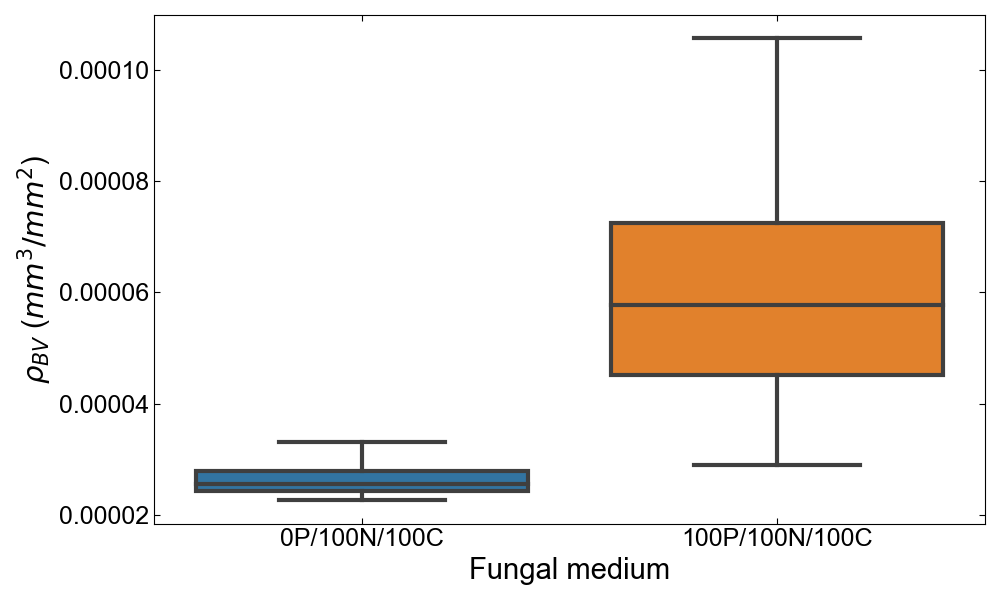

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with columns 'speed' and 'root'

# Create a boxplot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.boxplot(x='FungalSide', y='density_BV', data=select_df)

# Optional: You can add labels and a title to the plot
plt.xlabel('Fungal medium')
plt.ylabel(r'$\rho_{BV}$ ($mm^3/mm^2$)')
# plt.title('Boxplot of Speed by Root Category')

# Show the plot
plt.tight_layout()

In [28]:
stop

NameError: name 'stop' is not defined

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
plt.subplots_adjust(left=0.2, wspace=0.6)
axes = axes.flatten()  # Flatten the array of axes to easily loop through it

# Assuming `df` is your DataFrame
plots = [
    ('speed', 'density_L', 'a', '$v$ (um/h)', r'$\rho_L$ ($mm/mm^2$)'),
    ('speed', 'density_SA', 'b', '$v$ (um/h)', r'$\rho_{SA}$ ($mm^2/mm^2$)'),
    ('speed', 'density_BV', 'c', '$v$ (um/h)', r'$\rho_{BV}$ ($mm^3/mm^2$)'),
    ('speed', 'L_growth_coeff', 'd', '$v$ (um/h)', '$a_L$ ($mm/h^2$)'),
    ('speed', 'SA_growth_coeff', 'e', '$v$ (um/h)', '$a_{SA}$ ($mm^2/h^2$)'),
    ('speed', 'BV_growth_coeff', 'f', '$v$ (um/h)', '$a_{BV}$ ($mm^3/h^2$)'),
    # ('speed', 'radius', 'g', 'speed (um/h)', 'effective mean radius ($\mu m$)')
]

for i, (x_col, y_col, label,xlabel,ylabel) in enumerate(plots):
    plot_scatter_with_mean_and_ci(df, x_col, y_col, ax=axes[i], label=label)
    axes[i].set_xlabel(xlabel)
    axes[i].set_ylabel(ylabel)
num_plots = len(plots)

# Making the unused subplots invisible
for i in range(num_plots, len(axes)):
    axes[i].axis('off')
for i in range(0,num_plots):
    axes[i].legend().remove()
# plt.savefig(os.path.join('figures', 'AllFigures.pdf'), transparent=True, bbox_inches='tight')
# plt.show()

In [ ]:
# Initialize an empty DataFrame to hold the concatenated data
concatenated_data = []

for j in range(0, len(plates)):
    
    plate_id = plates[j]
    if plate_start[plate_id] >= 20220101:
        
        plate = int(plate_id.split('_')[0])
        
        time_plate_info_plate = time_plate_info.loc[time_plate_info['unique_id'] == int(plate_id)]
        time_plate_info_plate = time_plate_info_plate.sort_values(by='time_since_begin_h')
        folders_plate = folders.loc[folders['unique_id'] == int(plate_id)]
        time_plate_info_plate = time_plate_info_plate.loc[time_plate_info_plate['timestep'] < timestep[plate]]
        t_shift = time_plate_info_plate[time_plate_info_plate['area_sep_comp'] >= 100]['time_since_begin_h'].iloc[0]
        time_plate_info_plate['time_since_begin_h_shifted'] = time_plate_info_plate['time_since_begin_h'] - t_shift+40
        # Add the strain information to the DataFrame
        time_plate_info_plate['strain'] = plate_strain[plate_id]
        # time_plate_info_plate['is_in'] = time_plate_info_plate['timestep']<timestep[plate]
        
        time_plate_info_plate['strain_unique_id'] = time_plate_info_plate['strain'].astype(str) + '_' + time_plate_info_plate['unique_id'].astype(str)
        # Append this modified DataFrame to a list
        concatenated_data.append(time_plate_info_plate)

# Concatenate all the DataFrames in the list into a single DataFrame
final_data = pd.concat(concatenated_data)

# Replace -1.0 with NaN
final_data = final_data.replace(-1.0, np.nan)


In [ ]:
fig,ax = plt.subplots(figsize = (5,8))
n_colors = len(final_data['strain'].unique())
bin_size = 4

final_data['time_hour_binned'] = final_data['time_since_begin_h_shifted'].astype(int)//bin_size*bin_size
tmax = 150
select = final_data[final_data['time_since_begin_h_shifted']<=tmax]
palette = sns.color_palette("rainbow", n_colors)
strain_to_color = dict(zip(select['strain'].unique(), palette))
# sns.lineplot(data=select, x='time_since_begin_h_shifted', y=select['tot_biovolume_study'], hue='strain', style='strain_unique_id',ax=ax, palette=strain_to_color,lw = 1)
sns.lineplot(data=select, x='time_hour_binned', y=select['tot_biovolume_study'], hue='strain', ax=ax, palette=strain_to_color, estimator='mean', lw=5, ls="-")
ax.legend().remove()
ax.set_xlabel('t (hour)')
ax.set_ylabel('BV ($\mu m^3$)')
ax.set_ylim(0,1e8)
ax.set_xlim(0,tmax)

plt.savefig(os.path.join('figures', 'time_biovolume.pdf'), transparent=True, bbox_inches='tight')


In [ ]:
fig,ax = plt.subplots(figsize = (5,8))
n_colors = len(final_data['strain'].unique())
palette = sns.color_palette("rainbow", n_colors)
strain_to_color = dict(zip(select['strain'].unique(), palette))
# sns.lineplot(data=select, x='time_since_begin_h_shifted', y=select['tot_length_study'], hue='strain', style='strain_unique_id',ax=ax, palette=strain_to_color,lw = 1)
sns.lineplot(data=select, x='time_hour_binned', y=select['tot_length_study'], hue='strain', ax=ax, palette=strain_to_color, estimator='mean', lw=5, ls="-")
ax.legend().remove()
ax.set_xlabel('t (hour)')
ax.set_ylabel('L ($\mu m$)')
ax.set_ylim(0,4e6)
ax.set_xlim(0,tmax)
plt.savefig(os.path.join('figures', 'time_length.pdf'), transparent=True, bbox_inches='tight')


In [ ]:
fig,ax = plt.subplots(figsize = (5,8))
n_colors = len(final_data['strain'].unique())
bin_size = 4

final_data['time_hour_binned'] = final_data['time_since_begin_h_shifted'].astype(int)//bin_size*bin_size

select = final_data[final_data['time_since_begin_h_shifted']<=140]
palette = sns.color_palette("rainbow", n_colors)
strain_to_color = dict(zip(select['strain'].unique(), palette))
sns.lineplot(data=select, x='time_since_begin_h_shifted', y=select['area_sep_comp'], hue='strain', style='strain_unique_id',ax=ax, palette=strain_to_color,lw = 1)
# sns.lineplot(data=select, x='time_hour_binned', y=select['area_sep_comp'], hue='strain', ax=ax, palette=strain_to_color, estimator='mean', lw=5, ls="-")
ax.legend().remove()
ax.set_xlabel('t (hour)')
ax.set_ylabel('BV ($\mu m^3$)')
# ax.set_ylim(0,1e8)
# plt.savefig(os.path.join('figures', 'time_biovolume.pdf'), transparent=True, bbox_inches='tight')


In [ ]:
coefficients

In [ ]:
fig,ax = plt.subplots()
for j in range(0,len(plates)):
    plate_id=plates[j]
    if type(plate_start[plate_id]) == int and plate_start[plate_id]>=20220101:
        ax.scatter(plate_speeds[plate_id],plate_density_biov[plate_id]*plate_speeds[plate_id]**3,color = colors[plate_strain[plate_id]])

In [ ]:
growth_coefficients = [plate_density_biov[plate_id]*plate_speeds[plate_id]**2 for plate_id in plates]
speeds =  [plate_speeds[plate_id] for plate_id in plates]
densities = [plate_density[plate_id] for plate_id in plates]

In [ ]:
import seaborn as sns
data = pd.DataFrame({'Growth Coefficients': growth_coefficients,
                     'Speed': speeds,
                     'Densities': densities})

# Create the scatter plot matrix with regression lines
sns.pairplot(data, kind='reg')

In [ ]:
for plate in plates:
    fig,ax = plt.subplots()
    
    select = time_plate_info.loc[time_plate_info["unique_id"] == int(plate)]
    # Ds[plate] = select["density"].iloc[timestep[int(plate.split('_')[0])]]
    ax.plot(select["timestep"],select["density"])
    ax.set_title(plate)

In [ ]:
total = [np.nan]+hull_speeds+[np.nan]*2
len(total)

In [ ]:
table["hull_speed"]

In [ ]:
table = table.transpose()
table.to_json(path_save)